In [ ]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the data (Kaggle format)
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
# Display 5-pointer summary
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [ ]:
# Replace zeros with the median in each column (except for 'Outcome')
for column in df.columns:
    if column != 'Outcome':  # Skip the target column
        median = df[column].median()
        df[column] = df[column].replace(0, median)

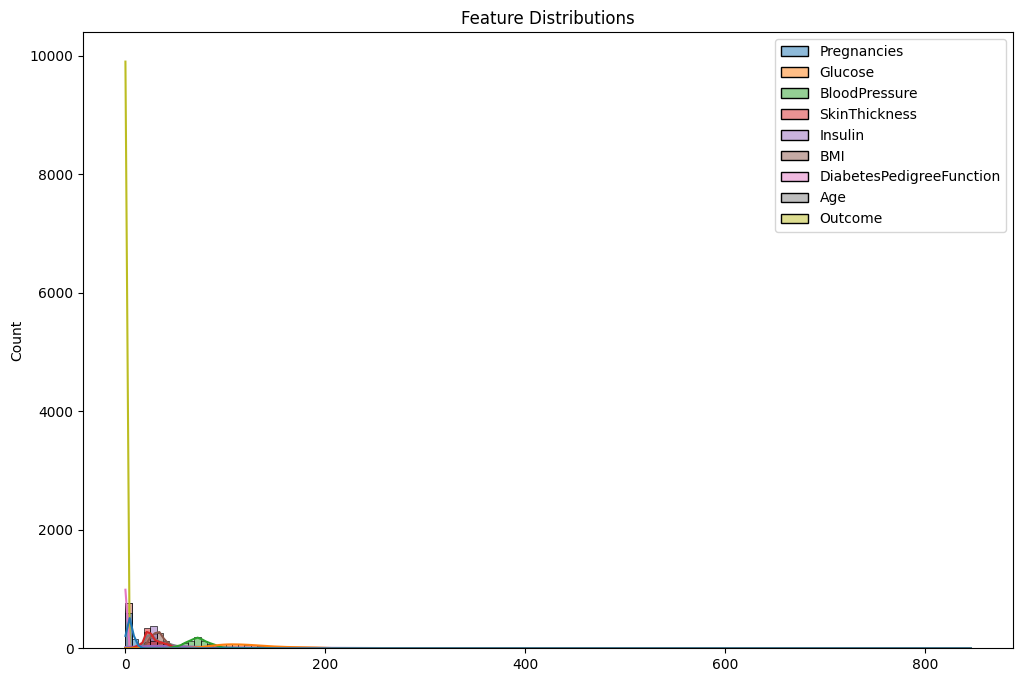

In [ ]:
# Plot data distributions
plt.figure(figsize=(12, 8))
sns.histplot(df, kde=True)
plt.title("Feature Distributions")
plt.show()

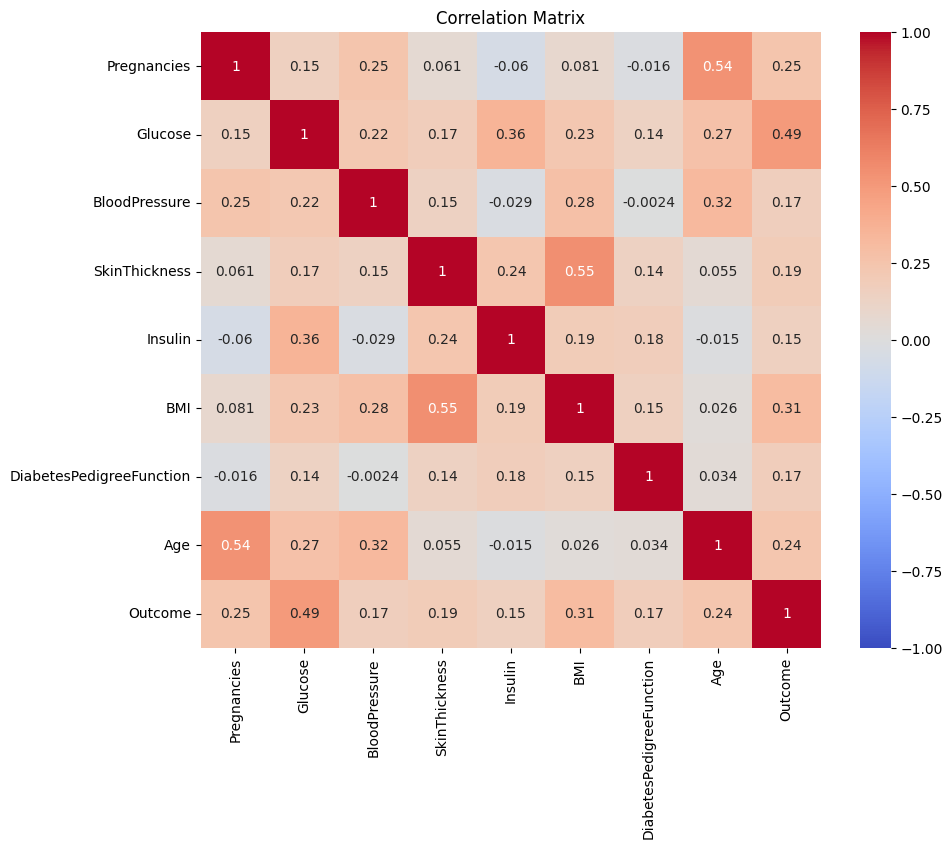

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

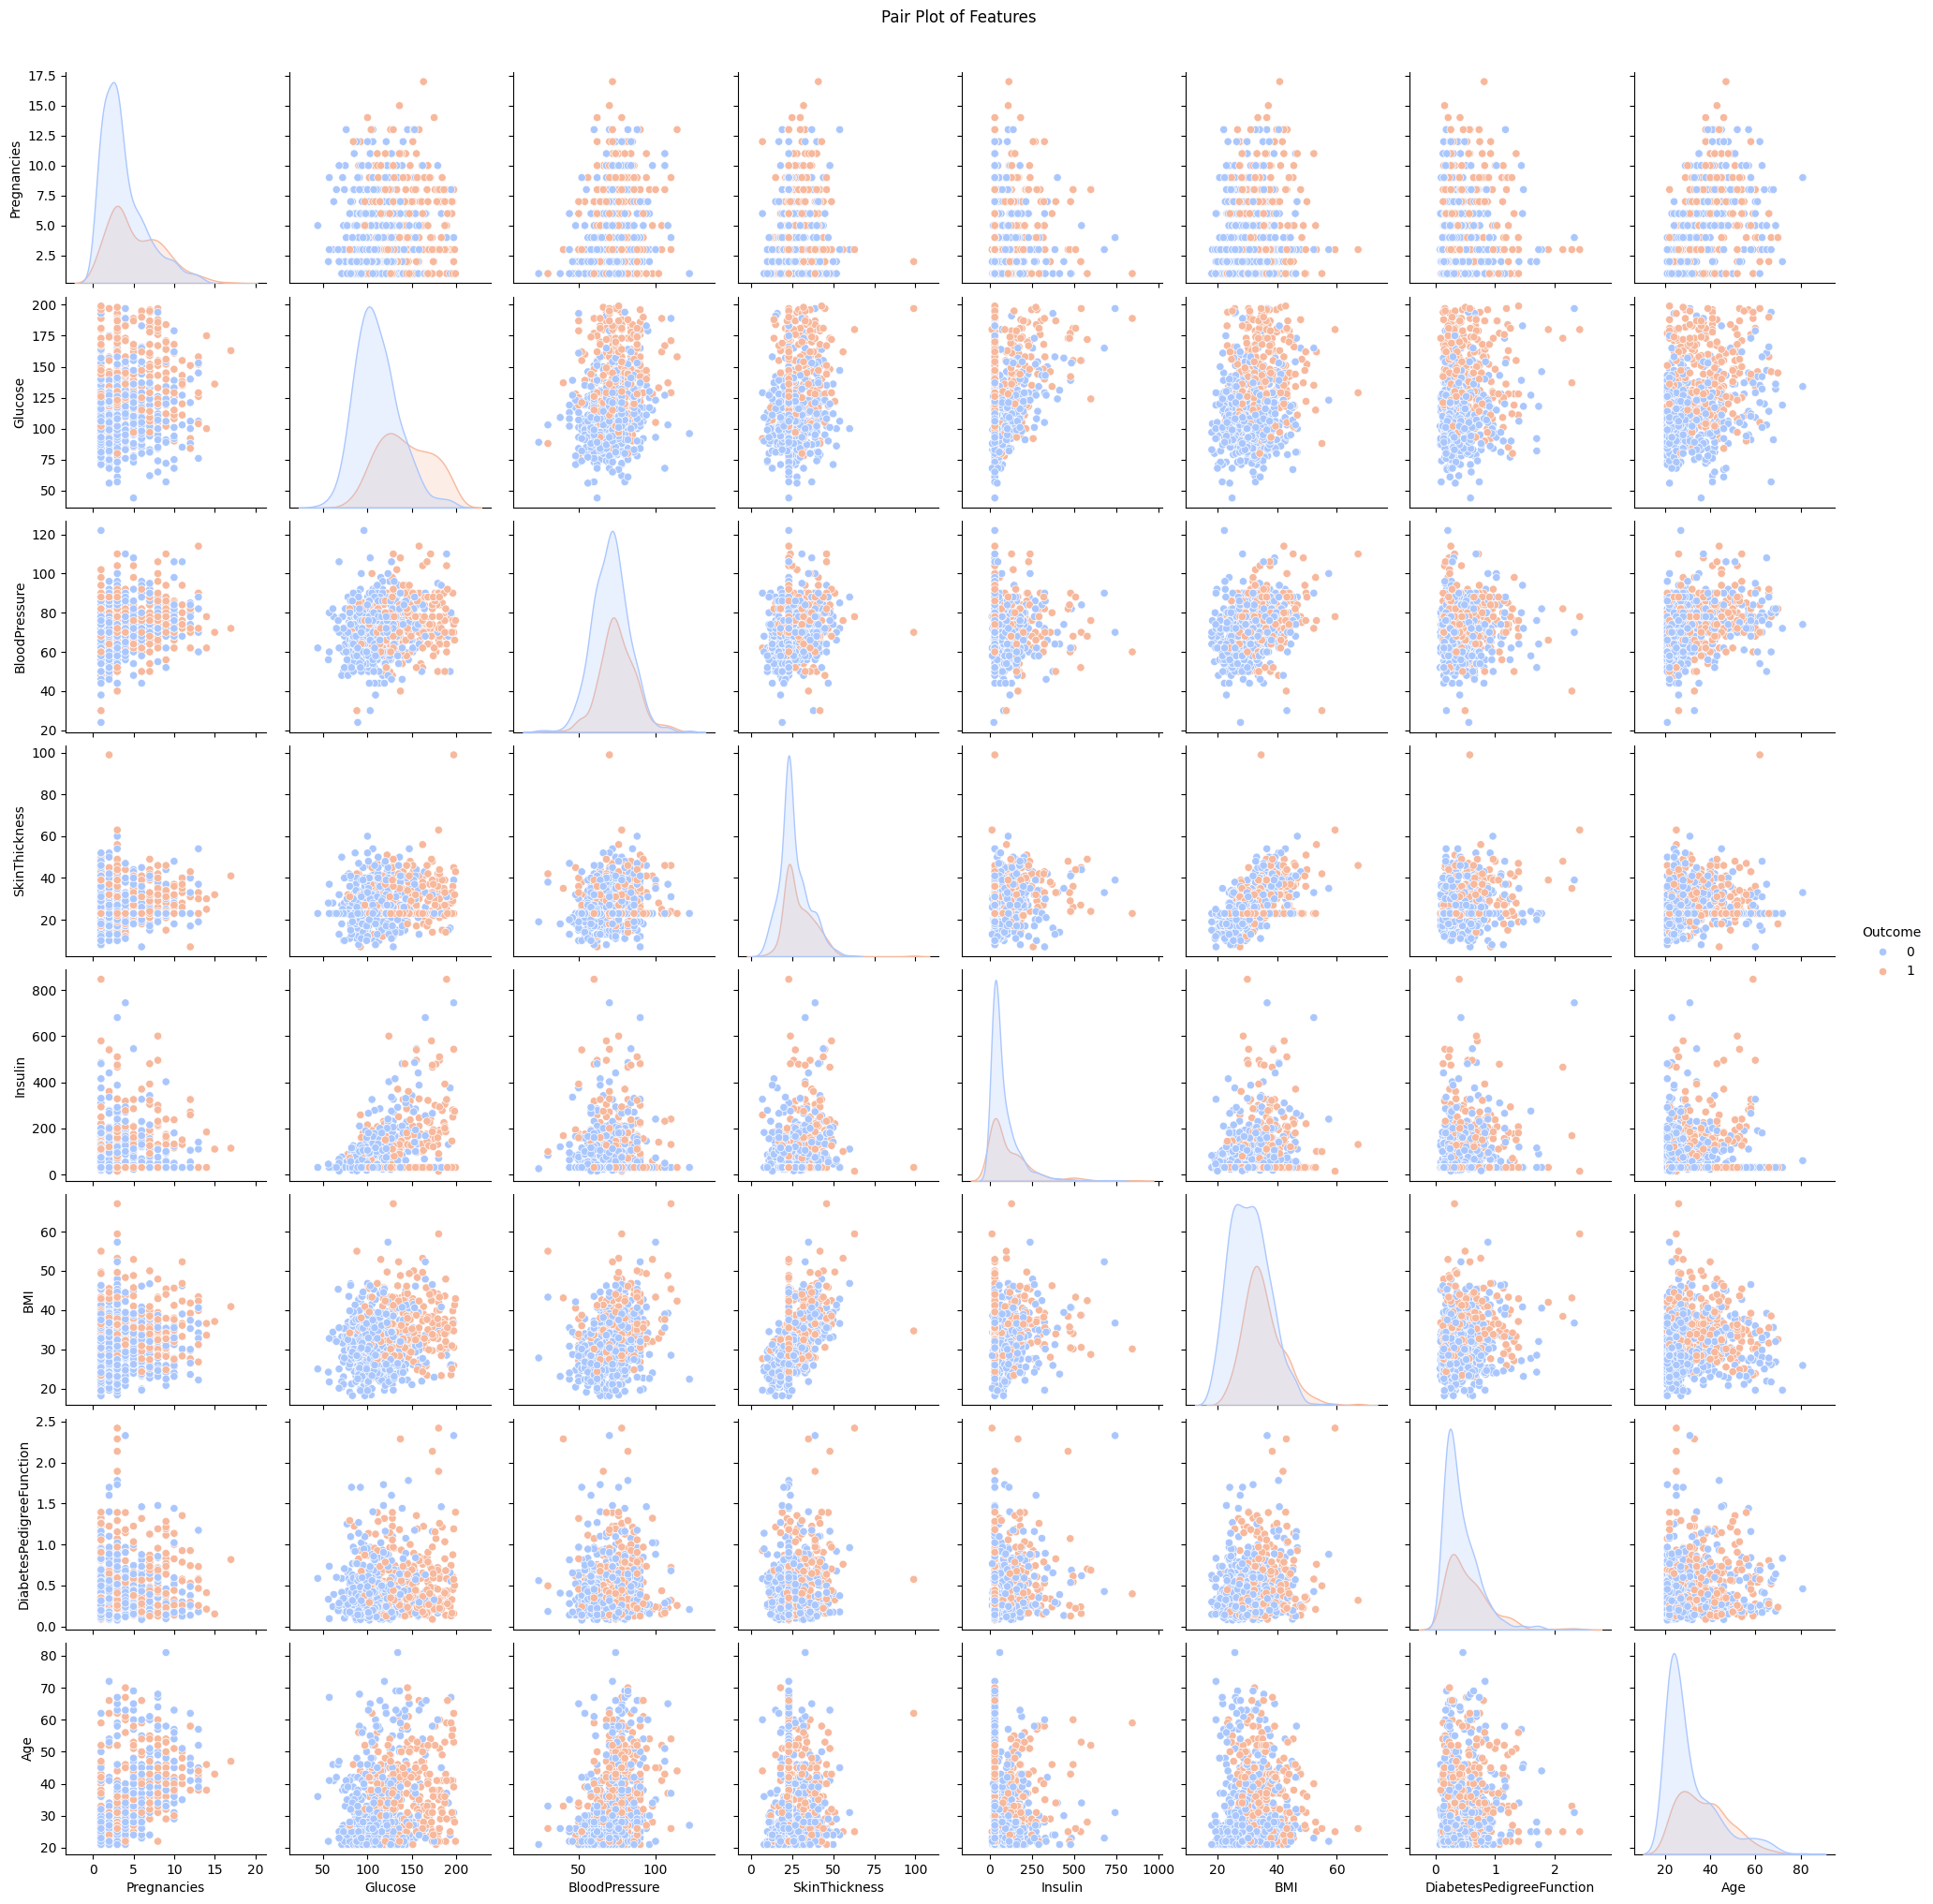

In [ ]:
# Pair plot for relationships between features
sns.pairplot(df, hue='Outcome', palette="coolwarm")
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

<ipython-input-8-141179c32ff2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=column, palette="coolwarm")
<ipython-input-8-141179c32ff2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=column, palette="coolwarm")
<ipython-input-8-141179c32ff2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=column, palette="coolwarm")
<ipython-input-8-141179c32ff2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

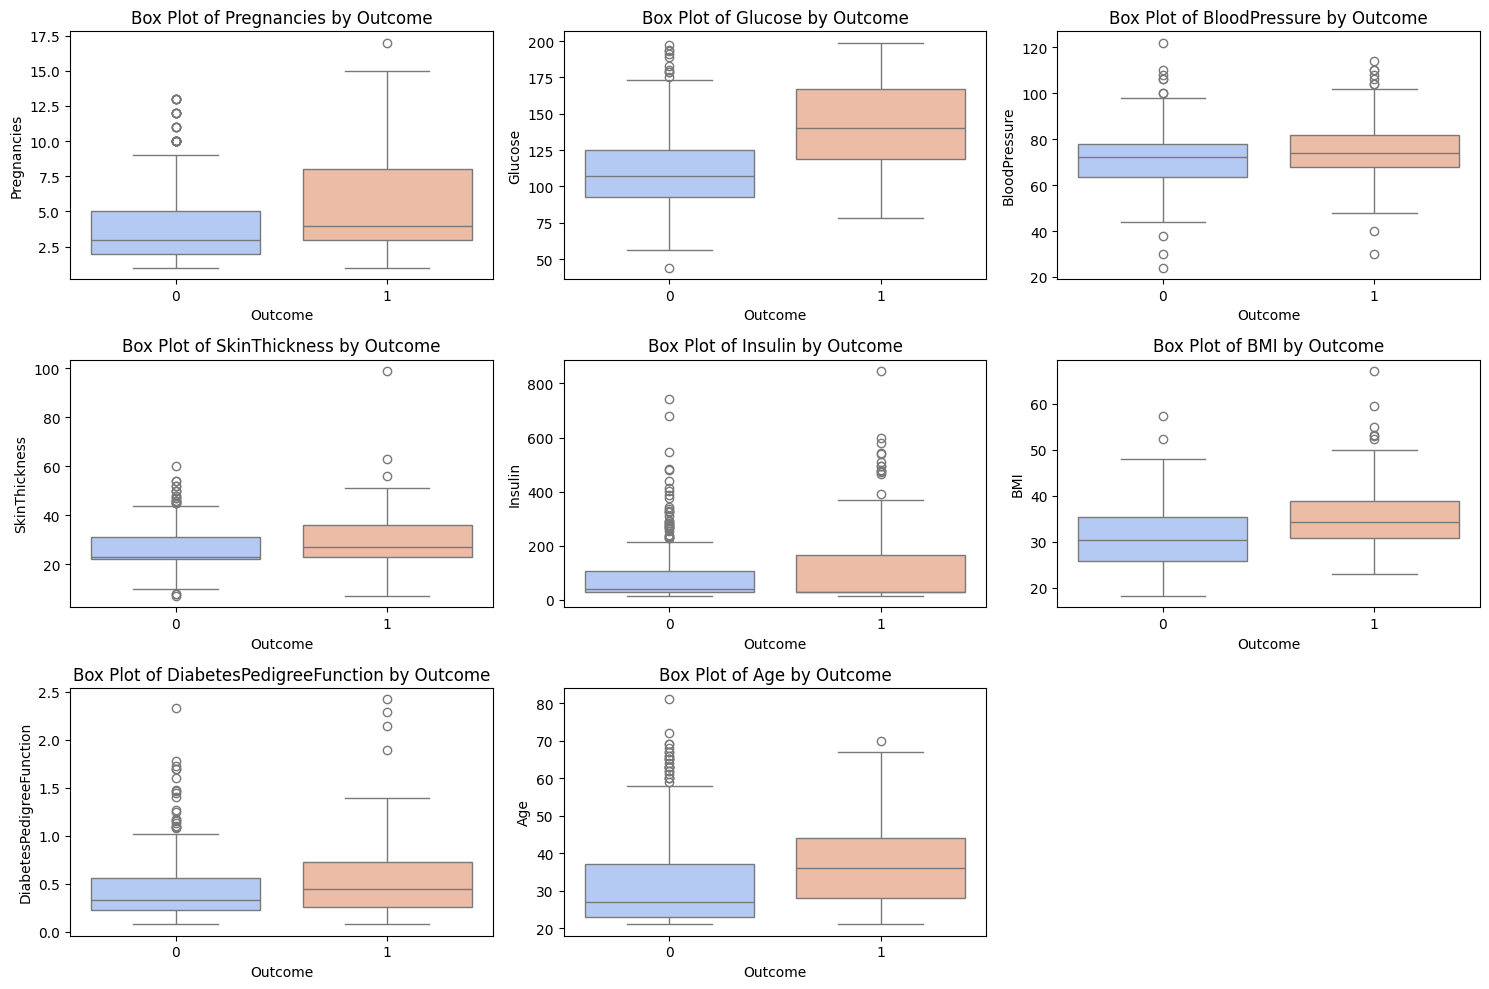

In [ ]:
# Box plots for each feature to inspect distributions by Outcome
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Skip 'Outcome' for individual feature box plots
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='Outcome', y=column, palette="coolwarm")
    plt.title(f"Box Plot of {column} by Outcome")
plt.tight_layout()
plt.show()

In [ ]:
# Separate independent and dependent features
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Split data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=0)

In [ ]:
# Use GridSearchCV to find the best parameters for the SVM model
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=1)

In [ ]:
# Best parameters and model accuracy
print("Best Parameters from GridSearchCV: ", grid.best_params_)
best_model = grid.best_estimator_

Best Parameters from GridSearchCV:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print("Training Set Accuracy:", train_accuracy)

Training Set Accuracy: 0.7932960893854749


In [ ]:
# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.7705627705627706


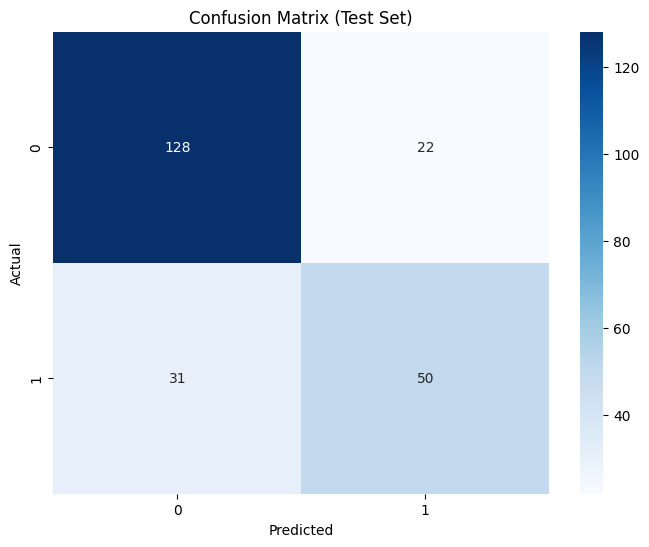

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       150
           1       0.69      0.62      0.65        81

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



In [ ]:
# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report (Test Set):\n", classification_report(y_test, best_model.predict(X_test)))